# Machine Learning Task - Logistic Regression Classifier

## by Carl Cassar

## Task Description

#### The scope of this task is to implement, on a small scale, a 'complete' ML solution, starting from reading and preparing the data, to performing the classification and evaluating the result.

#### The dataset consists of several features describing both personal and financial attributes of an individual. Furthermore, it also contains a field, i.e. "y", which specifies whether the individual proceeded with a "term deposit" or not.

#### For the purpose of this task, a binary classification solution needs to be implemented to predict this classification.

#### Dataset citation:
#### S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## 1. Preparation and cleaning of data

#### This consists of reading the data and pre-processing it to prepare the structure and data format required for the ingestion to the ML model.

In [1]:
# Importing the relevant Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Next I read the data downloaded from Kaggle (https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets). The data is stored in 2 csv files, 'train.csv' and 'test.csv'. The aim here is to vertically concatenate these two datasets and read it into a Pandas dataframe.

In [2]:
train_df = pd.read_csv('train.csv', sep = ';', header = 0)
test_df = pd.read_csv('test.csv', sep = ';', header = 0)
allData = [test_df, train_df]
df = pd.concat(allData)

In [3]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
test_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [7]:
df.shape

(49732, 17)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
# Changing the index so that all index values are unique.
df = df.set_index(np.arange(0, len(df.iloc[:,0])))
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
49731,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


#### Context of dataset
#### Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

#### Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centres are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

#### The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y). The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

#### Detailed column descriptions
#### bank client data:
#### 1 - age (numeric)
#### 2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
#### 3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
#### 4 - education (categorical: "unknown","secondary","primary","tertiary")
#### 5 - default: has credit in default? (binary: "yes", "no")
#### 6 - balance: average yearly balance, in euros (numeric)
#### 7 - housing: has housing loan? (binary: "yes", "no")
#### 8 - loan: has personal loan? (binary: "yes","no")
#### # related with the last contact of the current campaign:
#### 9 - contact: contact communication type (categorical: "unknown", "telephone", "cellular")
#### 10 - day: last contact day of the month (numeric)
#### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#### 12 - duration: last contact duration, in seconds (numeric)
#### # other attributes:
#### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
#### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
#### Output variable (desired target):
#### 17 - y - has the client subscribed a term deposit? (binary: "yes", "no")
#### Missing Attribute Values: None


In [12]:
# Checking the numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
# Checking the categorical variables
for col in df.select_dtypes(include = 'object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [14]:
# Changing the column name of the response variable
df = df.rename(columns = {'y': 'response'})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
# Adding the column names for the categorical variables to a list
categorical_variables = []
# Storing the column numbers of categorical variables
col_idx_categorical = []
idx = 0
for feature in df.columns:
    if (df[feature].dtypes == 'object') & (feature != 'response'):
        categorical_variables = categorical_variables + [feature]
        col_idx_categorical = col_idx_categorical + [idx]
    idx = idx + 1
print('There are {} categorical variables.'.format(len(categorical_variables)))

There are 9 categorical variables.


In [16]:
for feature in categorical_variables:
    print('The variable is {} and the number of categories is {}.'
          .format(feature, len(df[feature].unique())))

The variable is job and the number of categories is 12.
The variable is marital and the number of categories is 3.
The variable is education and the number of categories is 4.
The variable is default and the number of categories is 2.
The variable is housing and the number of categories is 2.
The variable is loan and the number of categories is 2.
The variable is contact and the number of categories is 3.
The variable is month and the number of categories is 12.
The variable is poutcome and the number of categories is 4.


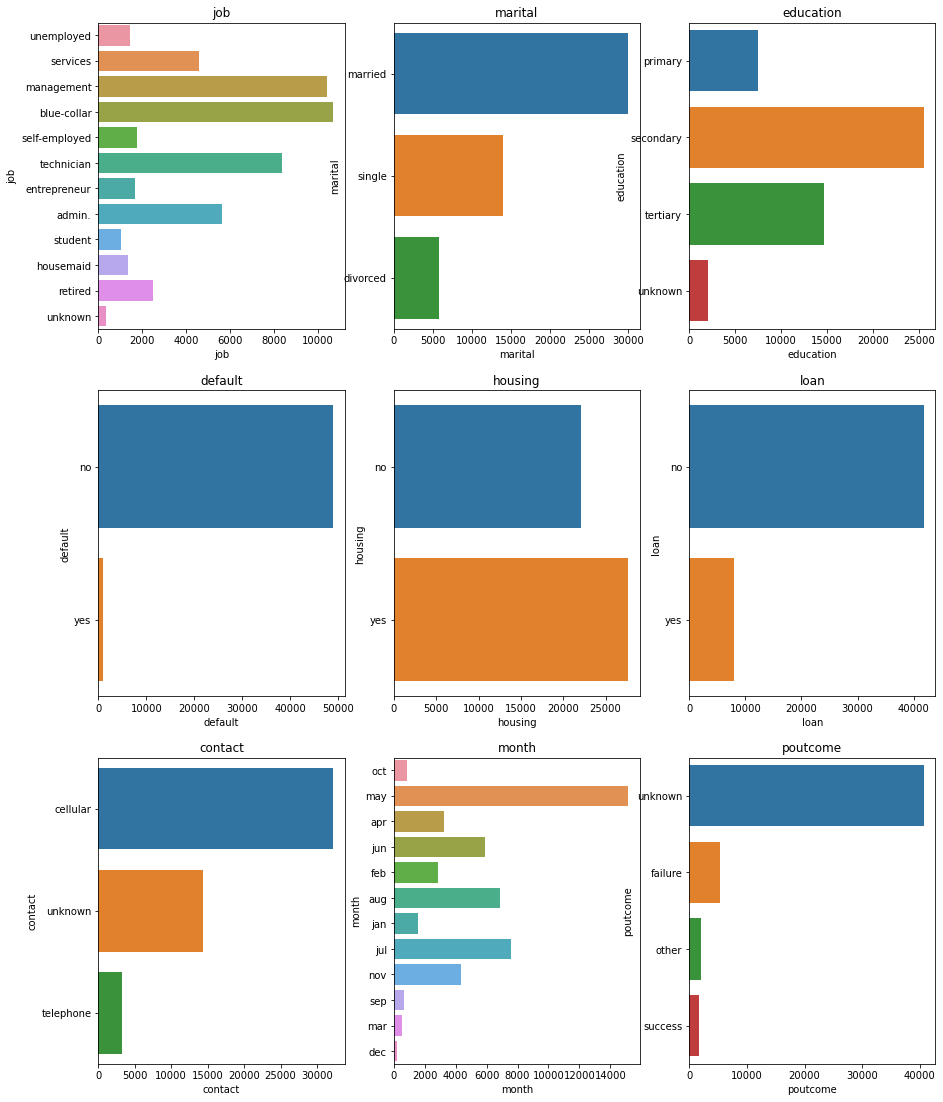

In [17]:
# Checking the frequency of each category in each categorical variable
plt.figure(figsize = (15, 80), facecolor = 'white')
plotnumber = 1
for i in categorical_variables:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(y = i, data = df)
    plt.xlabel(i)
    plt.title(i)
    plotnumber = plotnumber + 1
plt.show()

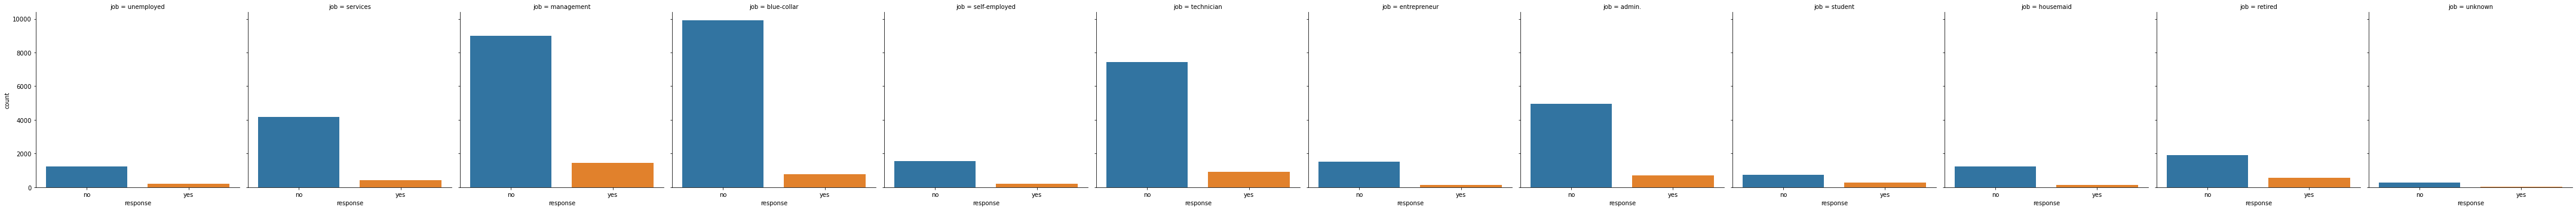

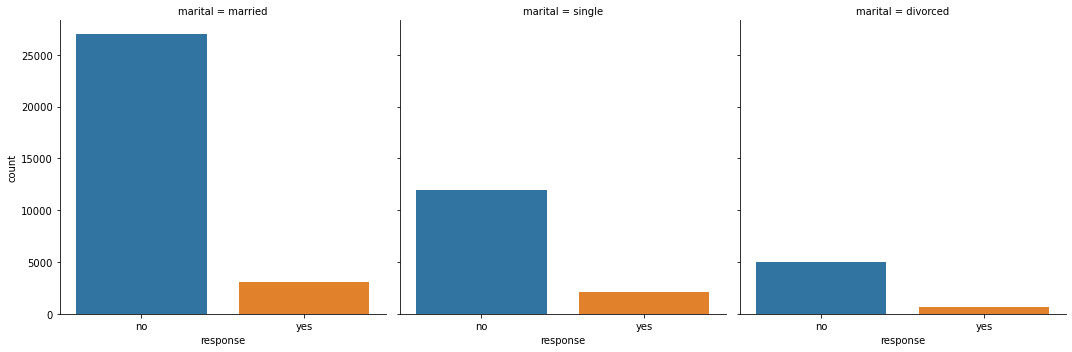

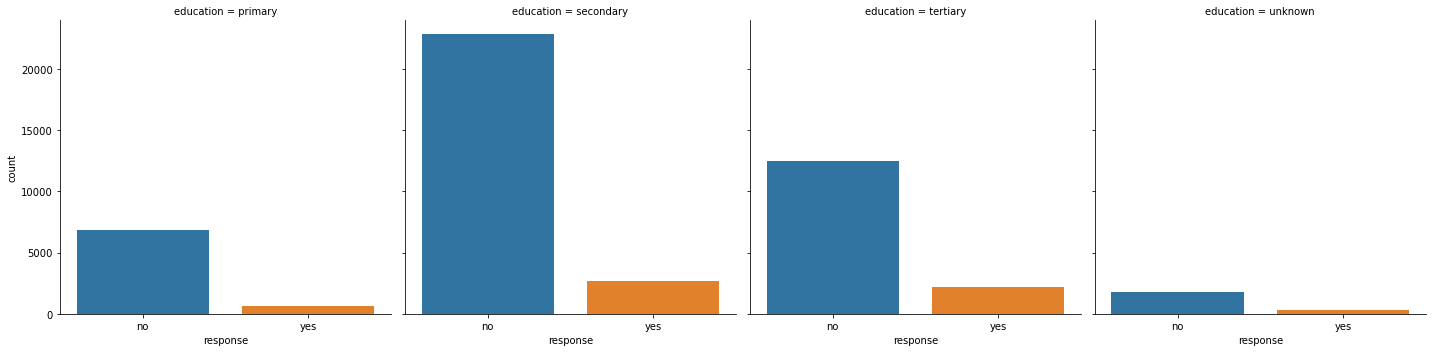

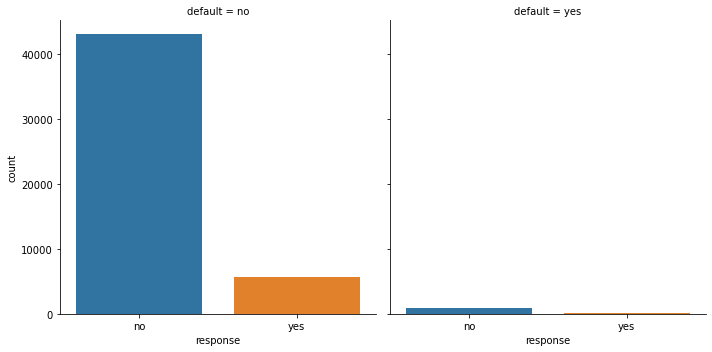

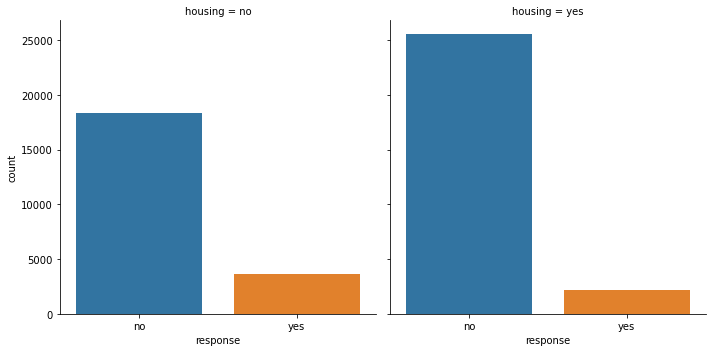

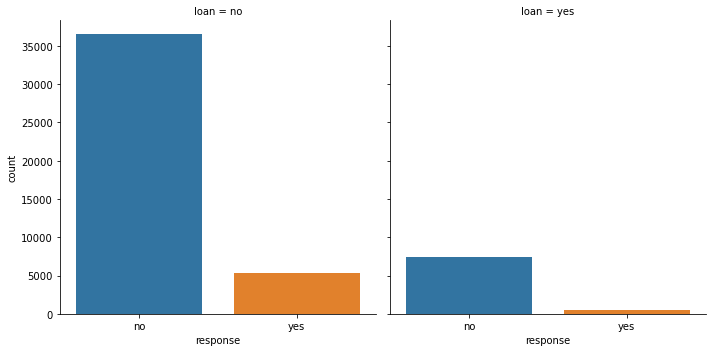

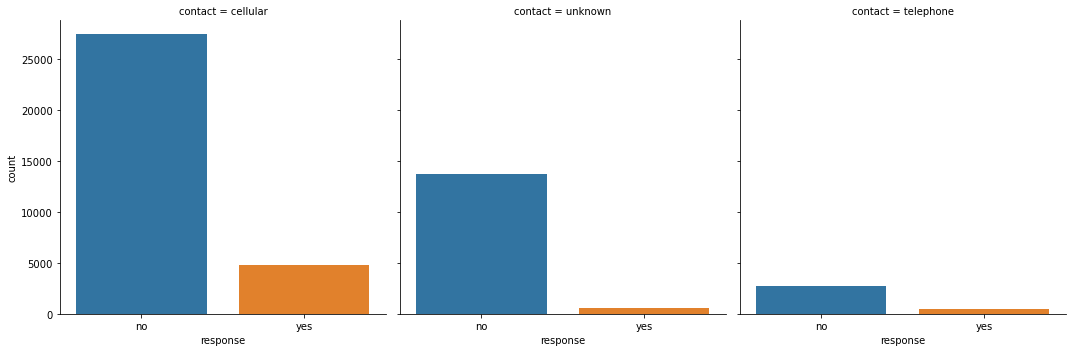

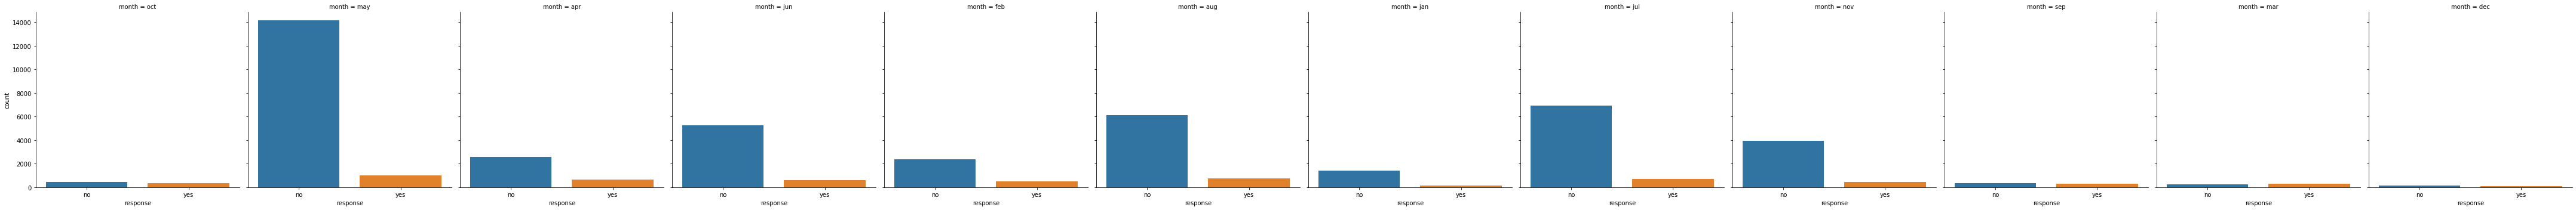

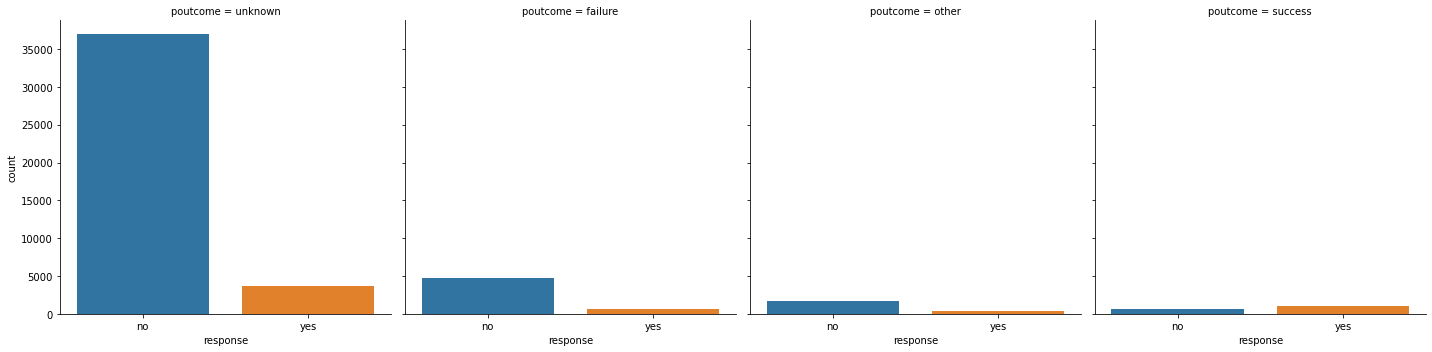

In [18]:
# Plotting the relationship between the categories of each categorical variable
# and the response variable.
for i in categorical_variables:
    sns.catplot(x = 'response', col = i, kind = 'count', data = df)
plt.show()

In [19]:
# Checking the counts of yes/no responses for each categorical variable.
for i in categorical_variables:
    print(df.groupby(['response', i]).size())

response  job          
no        admin.           4960
          blue-collar      9901
          entrepreneur     1517
          housemaid        1229
          management       8995
          retired          1924
          self-employed    1555
          services         4164
          student           734
          technician       7442
          unemployed       1216
          unknown           285
yes       admin.            689
          blue-collar       777
          entrepreneur      138
          housemaid         123
          management       1432
          retired           570
          self-employed     207
          services          407
          student           288
          technician        923
          unemployed        215
          unknown            41
dtype: int64
response  marital 
no        divorced     5036
          married     26979
          single      11907
yes       divorced      699
          married      3032
          single       2079
dtype: i

In [20]:
# Adding the column names for the numerical variables to a list
numerical_variables = []
# Storing the column numbers of numerical variables
col_idx_numerical = []
idx = 0
for i in df.columns:
    if (df[i].dtypes != 'object'):
        numerical_variables = numerical_variables + [i]
        col_idx_numerical = col_idx_numerical + [idx]
    idx = idx + 1
print('There are {} numerical variables.'.format(len(numerical_variables)))

There are 7 numerical variables.


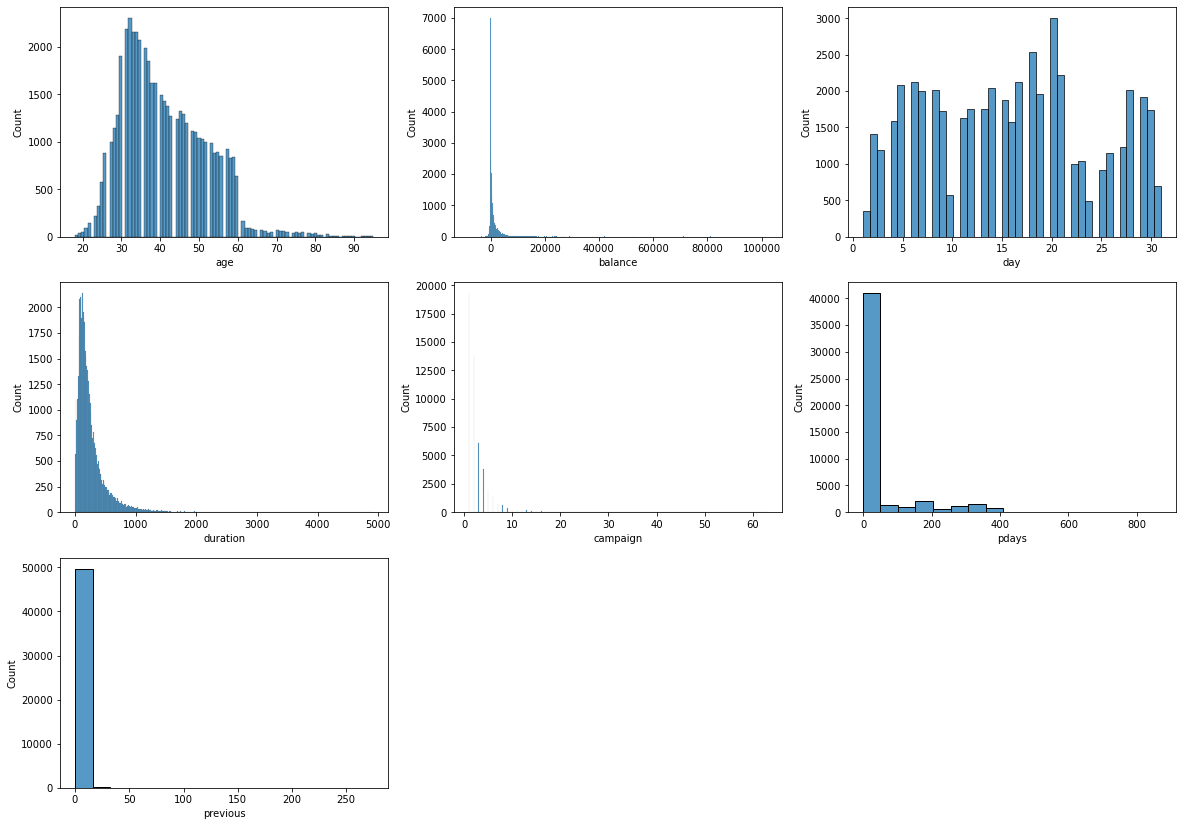

In [21]:
# Sample distributions for numerical variables
plt.figure(figsize = (20, 60), facecolor = 'white')
plotnumber = 1
for i in numerical_variables:
    ax = plt.subplot(12, 3, plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i)
    plotnumber = plotnumber + 1
plt.show()

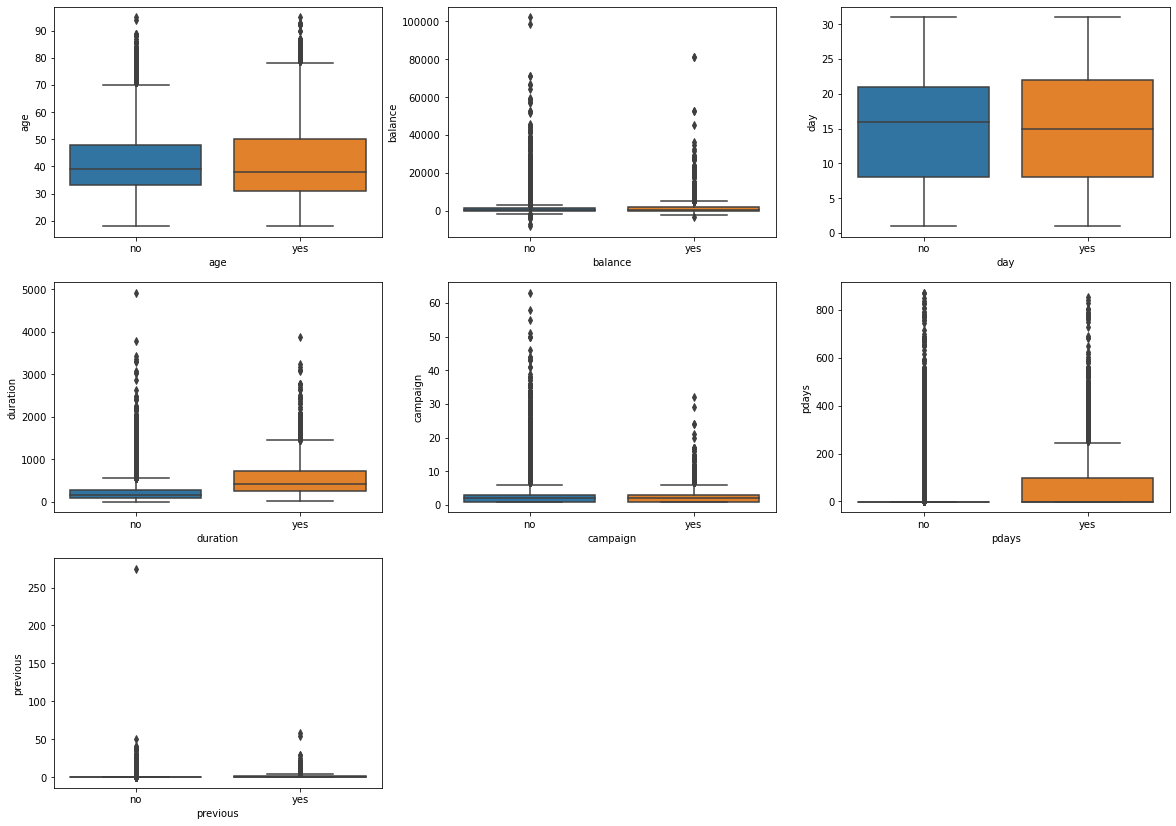

In [22]:
# Boxplots for numerical variables
plt.figure(figsize = (20, 60), facecolor = 'white')
plotnumber = 1
for i in numerical_variables:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = "response", y = df[i], data = df)
    plt.xlabel(i)
    plotnumber = plotnumber + 1
plt.show()

<AxesSubplot:>

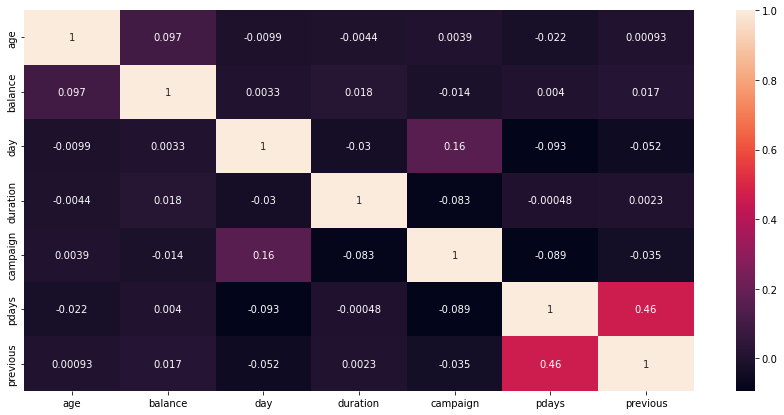

In [23]:
# Plotting the correlation between numerical variables
corr_matrix = df.corr()
fig = plt.figure(figsize = (15, 7))
sns.heatmap(corr_matrix, annot = True)

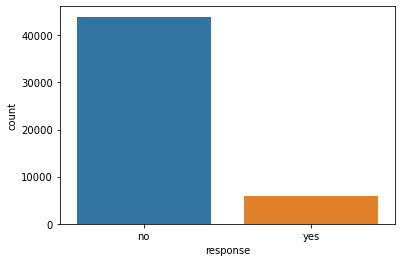

In [24]:
# Checking whether the dataset is balanced with respect to the response
sns.countplot(x = 'response', data = df)
plt.show()

#### From the plot it can be seen that there is a high imbalance between the no-responses and the yes-responses. Since we will be undersampling the no-response instances, this will negatively affect the model.

In [25]:
# Convert dataframe into a numpy array
data_np = df.to_numpy()
df_categorical = df[categorical_variables]
np_categorical = df_categorical.to_numpy()
df_numerical = df[numerical_variables]
np_numerical = df_numerical.to_numpy()

In [26]:
data_np

array([[30, 'unemployed', 'married', ..., 0, 'unknown', 'no'],
       [33, 'services', 'married', ..., 4, 'failure', 'no'],
       [35, 'management', 'single', ..., 1, 'failure', 'no'],
       ...,
       [72, 'retired', 'married', ..., 3, 'success', 'yes'],
       [57, 'blue-collar', 'married', ..., 0, 'unknown', 'no'],
       [37, 'entrepreneur', 'married', ..., 11, 'other', 'no']],
      dtype=object)

In [27]:
data_np.shape

(49732, 17)

In [28]:
# Splitting the dataset into a training set and a test set
from sklearn.model_selection import train_test_split
# Taking all the data except the last column and storing it into X
X = data_np[:, :-1]
# Taking just the last column and storing it into y
y = data_np[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 0)

In [29]:
# Encoding the categorical features in the numpy array
from sklearn.preprocessing import OrdinalEncoder
X_train_categorical = X_train[:, col_idx_categorical]
X_test_categorical = X_test[:, col_idx_categorical]
oe = OrdinalEncoder()
oe.fit(X_train_categorical)
X_train_oe = oe.transform(X_train_categorical)
X_test_oe = oe.transform(X_test_categorical)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [31]:
# Standardizing the numerical data
from sklearn.preprocessing import StandardScaler
X_train_numerical = X_train[:, col_idx_numerical]
X_test_numerical = X_test[:, col_idx_numerical]
scaler = StandardScaler()
scaler.fit(X_train_numerical)
X_train_sc = scaler.transform(X_train_numerical)
X_test_sc = scaler.transform(X_test_numerical)

In [32]:
X_train_oe

array([[7., 1., 1., ..., 2., 8., 3.],
       [9., 2., 1., ..., 0., 1., 3.],
       [1., 1., 1., ..., 0., 9., 0.],
       ...,
       [1., 1., 0., ..., 0., 8., 0.],
       [1., 2., 1., ..., 0., 8., 3.],
       [9., 1., 0., ..., 2., 6., 3.]])

In [33]:
X_test_oe

array([[4., 1., 2., ..., 0., 3., 3.],
       [7., 1., 1., ..., 1., 5., 3.],
       [1., 2., 1., ..., 0., 8., 3.],
       ...,
       [7., 0., 3., ..., 0., 5., 3.],
       [1., 1., 1., ..., 2., 6., 3.],
       [1., 1., 1., ..., 0., 8., 3.]])

In [34]:
y_train_le

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
y_test_le

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
X_train_sc

array([[ 2.84138272e-01, -2.38123355e-03, -1.29720004e+00, ...,
        -5.70367427e-01, -4.10288191e-01, -2.43829988e-01],
       [-1.03752914e+00, -3.99168754e-01,  1.10957616e+00, ...,
         4.00418877e-01, -4.10288191e-01, -2.43829988e-01],
       [ 5.67352718e-01,  5.30361401e-01,  6.28220918e-01, ...,
         1.37120518e+00,  1.15321520e+00,  1.89769180e+00],
       ...,
       [-5.65505067e-01, -5.13975295e-01, -9.38119405e-02, ...,
         7.68234422e-02,  3.22107453e+00,  1.84474369e-01],
       [-1.13193396e+00, -3.26659359e-01,  2.67204489e-01, ...,
        -5.70367427e-01, -4.10288191e-01, -2.43829988e-01],
       [ 3.78543087e-01, -5.66007499e-01, -8.15844799e-01, ...,
        -2.46771992e-01, -4.10288191e-01, -2.43829988e-01]])

In [37]:
X_test_sc

array([[ 1.88902013,  1.56160612, -1.65821647, ...,  0.07682344,
        -0.41028819, -0.24382999],
       [-0.56550507, -0.45791479, -0.8158448 , ..., -0.57036743,
        -0.41028819, -0.24382999],
       [-1.22633878, -0.45791479, -0.93618361, ...,  0.07682344,
        -0.41028819, -0.24382999],
       ...,
       [ 1.13378161, -0.11819485,  1.47059259, ..., -0.24677199,
        -0.41028819, -0.24382999],
       [-0.84871951, -0.42602408, -1.29720004, ..., -0.24677199,
        -0.41028819, -0.24382999],
       [-0.37669544, -0.0839543 , -1.17686123, ..., -0.57036743,
        -0.41028819, -0.24382999]])

## 2. Feature selection

#### Due to the cumbersome number of available attributes, some data analysis is expected to be applied to select the features which appear to be more significant than the rest.

In [38]:
# Applying feature selection for the categorical variables in the training set
# using the chi-squared test and SelectKBest
from sklearn.feature_selection import SelectKBest, chi2
fsCategorical = SelectKBest(score_func = chi2, k = 'all')
fsCategorical.fit(X_train_oe, y_train_le)
X_train_oe_fs = fsCategorical.transform(X_train_oe)
X_test_oe_fs = fsCategorical.transform(X_test_oe)

In [39]:
for i in range(len(fsCategorical.scores_)):
    print('Feature {}: {}'.format(i, fsCategorical.scores_[i]))

Feature 0: 153.70057124610577
Feature 1: 22.890387968954084
Feature 2: 68.80584443324855
Feature 3: 12.797180450857208
Feature 4: 298.1661299395066
Feature 5: 155.33007904735788
Feature 6: 1011.3551517836222
Feature 7: 33.70891747642696
Feature 8: 84.6078346014163


In [40]:
# Features 0, 4, 5 and 6 are the most important from the categorical features
# i.e. they seem to have the most predictive power.
categoricalFS = []
for i in [0, 4, 5, 6]:
    categoricalFS = categoricalFS + [categorical_variables[i]]
print('4 most predictive categorical features are:')
print(categoricalFS)

4 most predictive categorical features are:
['job', 'housing', 'loan', 'contact']


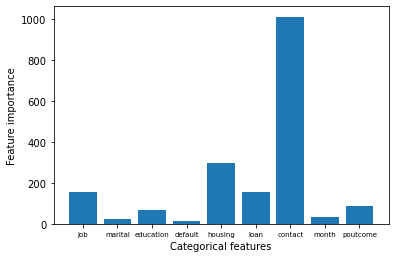

In [41]:
plt.bar([i for i in range(len(fsCategorical.scores_))], fsCategorical.scores_)
plt.xlabel('Categorical features')
plt.ylabel('Feature importance')
plt.xticks(ticks = np.arange(9),labels = categorical_variables, fontsize = 7)
plt.show()

In [42]:
# Applying feature selection for the numerical variables in the training set
# using the ANOVA f-test and SelectKBest
from sklearn.feature_selection import f_classif
fsNumerical = SelectKBest(score_func = f_classif, k = 'all')
fsNumerical.fit(X_train_sc, y_train_le)
X_train_sc_fs = fsNumerical.transform(X_train_sc)
X_test_sc_fs = fsNumerical.transform(X_test_sc)

In [43]:
for i in range(len(fsNumerical.scores_)):
    print('Feature {}: {}'.format(i, fsNumerical.scores_[i]))

Feature 0: 22.727834425705897
Feature 1: 100.08952518932665
Feature 2: 17.181396590963995
Feature 3: 6742.803669227697
Feature 4: 188.32073130164113
Feature 5: 428.3023759295736
Feature 6: 293.38844089105527


In [44]:
# Features 3, 4, 5 and 6 are the most important from the numerical features
numericalFS = []
for i in [3, 4, 5, 6]:
    numericalFS = numericalFS + [numerical_variables[i]]
print('4 most predictive numerical features are:')
print(numericalFS)

4 most predictive numerical features are:
['duration', 'campaign', 'pdays', 'previous']


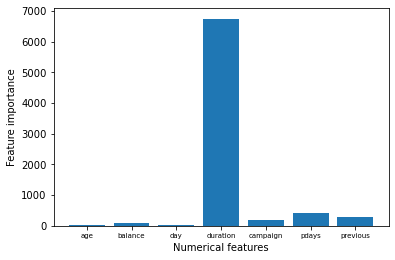

In [45]:
plt.bar([i for i in range(len(fsNumerical.scores_))], fsNumerical.scores_)
plt.xlabel('Numerical features')
plt.ylabel('Feature importance')
plt.xticks(ticks = np.arange(7),labels = numerical_variables, fontsize = 7)
plt.show()

In [46]:
# Creating the X- and y- training data to build the logistic regression model
# using only 8 features. We will use the encoded and standardised variables to
# do this, i.e. X_train_oe, X_train_sc and y_train_le 
X_in_train = np.hstack((X_train_oe[:, [0, 4, 5, 6]], 
                        X_train_sc[:, [3, 4, 5, 6]]))
X_in_train.shape

(37299, 8)

## 3. Fitting a logistic regression classifier on the training data and applying it to predict responses on the test data

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_in_train, y_train_le)

LogisticRegression()

In [48]:
X_in_test = np.hstack((X_test_oe[:, [0, 4, 5, 6]], 
                        X_test_sc[:, [3, 4, 5, 6]]))
X_in_test.shape

(12433, 8)

In [49]:
y_pred = logreg.predict(X_in_test)

## 4. Logistic regression model evaluation

#### The resulting classifier needs to be evaluated with "accuracy" as the scoring metric.

In [50]:
logreg_accuracy = logreg.score(X_in_test, y_test_le)
print('Accuracy of logistic regression classifier = ', 
      round(logreg_accuracy, 2))

Accuracy of logistic regression classifier =  0.89


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_le, y_pred)
print(confusion_matrix)

[[10788   195]
 [ 1152   298]]


In [52]:
print('Correct predictions of a no-term deposit = ', confusion_matrix[0, 0])
print('Incorrect predictions of a no-term deposit = ', confusion_matrix[1, 0])
print('Correct predictions of a term deposit = ', confusion_matrix[1, 1])
print('Incorrect predictions of a term deposit = ', confusion_matrix[0, 1])

Correct predictions of a no-term deposit =  10788
Incorrect predictions of a no-term deposit =  1152
Correct predictions of a term deposit =  298
Incorrect predictions of a term deposit =  195


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test_le, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10983
           1       0.60      0.21      0.31      1450

    accuracy                           0.89     12433
   macro avg       0.75      0.59      0.62     12433
weighted avg       0.87      0.89      0.87     12433



#### Although the overall accuracy of the model is 89%, it performs relatively poorly when the response is a yes because this category in the response variable has been undersampled.
#### A technique that can be used to overcome this problem is called minority oversampling.

#### Finally, to conclude the evaluation of the logistic regression classifier, I plot a Receiver Operating Characteristic (ROC) curve for the model.

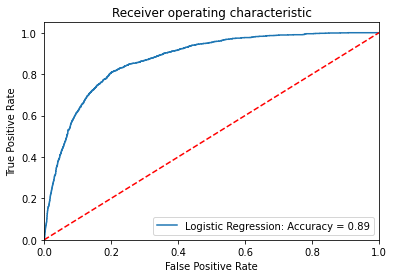

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_le, 
                                 logreg.predict_proba(X_in_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression: Accuracy = {}'
         .format(round(logreg_accuracy, 2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()